In [9]:
# vis an image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

labels = os.listdir("data/train/")
labels = [x[:-4] for x in labels]
labels = pd.Series(labels, name="Labels")

print(labels)

0      226md
1      22d5n
2      2356g
3      23mdg
4      243mm
       ...  
851    yx2d4
852    yxd7m
853    yy824
854    yyg5g
855    yyn57
Name: Labels, Length: 856, dtype: object


In [11]:
images = [mpimg.imread("data/train/" + x) for x in os.listdir("data/train/")]
images = pd.Series(images, name="Images")

print(images)

0      [[[0.7529412, 0.7529412, 0.7529412, 1.0], [0.7...
1      [[[0.7529412, 0.7529412, 0.7529412, 1.0], [0.7...
2      [[[0.7529412, 0.7529412, 0.7529412, 1.0], [0.7...
3      [[[0.7529412, 0.7529412, 0.7529412, 1.0], [0.7...
4      [[[0.7529412, 0.7529412, 0.7529412, 1.0], [0.7...
                             ...                        
851    [[[0.7529412, 0.7529412, 0.7529412, 1.0], [0.7...
852    [[[0.7529412, 0.7529412, 0.7529412, 1.0], [0.7...
853    [[[0.7529412, 0.7529412, 0.7529412, 1.0], [0.7...
854    [[[0.7529412, 0.7529412, 0.7529412, 1.0], [0.7...
855    [[[0.7529412, 0.7529412, 0.7529412, 1.0], [0.7...
Name: Images, Length: 856, dtype: object


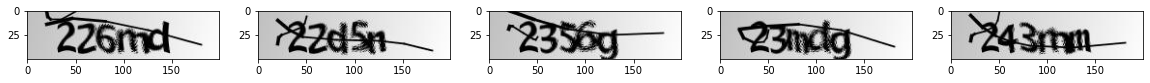

In [21]:
plt.figure(figsize=(20,20))

for i in range(5):
    ax = plt.subplot(1, 5, i+1)
    plt.imshow(images[i])

In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 32, padding=(2, 2), kernel_size=(2, 2), stride=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
    
    def forward(self, x):
        return self.main(x)

In [24]:
# EDA
images[0].shape

(50, 200, 4)

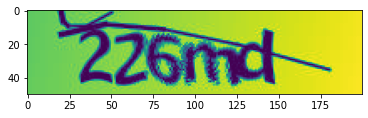

In [40]:
plt.imshow(images[0][:, :, 0:1])

In [41]:
# single image pass to the network
model = Network()
print(model)

Network(
  (main): Sequential(
    (0): Conv2d(1, 32, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
)


In [48]:
testimg = np.array(images[0][:, :, 0:1, None])

In [51]:
testimg = np.transpose(testimg)

In [54]:
model.forward(torch.Tensor(testimg))

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.2763,  ..., 0.3059, 1.1494, 0.0000],
          ...,
          [0.0000, 0.0000, 0.8577,  ..., 0.8872, 1.9859, 0.0000],
          [0.0000, 0.0000, 0.1151,  ..., 0.1357, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[1.8842, 1.8842, 1.8842,  ..., 1.8842, 1.8842, 1.8842],
          [1.8842, 0.8754, 1.2416,  ..., 1.2315, 2.2560, 1.8842],
          [1.8842, 0.4201, 0.0000,  ..., 0.0000, 1.1302, 1.8842],
          ...,
          [1.8842, 0.0000, 0.0000,  ..., 0.0000, 0.9021, 1.8842],
          [1.8842, 1.2889, 0.0000,  ..., 0.0000, 0.4178, 1.8842],
          [1.8842, 1.8842, 1.8842,  ..., 1.8842, 1.8842, 1.8842]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.3257,  ..., 0

In [59]:
# reprocess image data
test = np.array([np.transpose(np.array(x[:, :, 0:1])) for x in images])

In [60]:
test.shape

(856, 1, 200, 50)

In [62]:
model.forward(torch.Tensor(test))

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.1725, 0.1725, 0.1725,  ..., 0.1725, 0.1725, 0.1725],
          [0.1725, 0.1615, 0.1655,  ..., 0.1654, 0.1766, 0.1725],
          [0.1725, 0.1566, 0.1485,  ..., 0.1481, 0.1643, 0.1725],
          ...,
          [0.1725, 0.1517, 0.1411,  ..., 0.1407, 0.1618, 0.1725],
          [0.1725, 0.1661, 0.1502,  ..., 0.1500, 0.1566, 0.1725],
          [0.1725, 0.1725, 0.1725,  ..., 0.1725, 0.1725, 0.1725]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [64]:
fake_image = np.random.randn(1, 1, 224, 224)

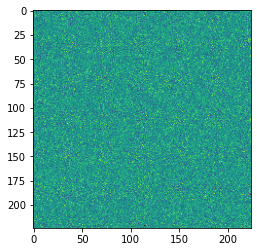

In [67]:
# noise
plt.imshow(fake_image[0, 0, :, :])
plt.show()

In [69]:
model.forward(torch.Tensor(fake_image))

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.7752, 0.0000,  ..., 0.2864, 0.6066, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.7060, 1.0759, 0.0000],
          ...,
          [0.0000, 0.0000, 0.9877,  ..., 1.1568, 1.1286, 0.0000],
          [0.0000, 0.0653, 0.5789,  ..., 0.4630, 0.5014, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0054, 0.0054, 0.0054,  ..., 0.0054, 0.0054, 0.0054],
          [0.0054, 1.0994, 0.0000,  ..., 0.0000, 0.2015, 0.0054],
          [0.0054, 0.0000, 0.7386,  ..., 0.0000, 0.0000, 0.0054],
          ...,
          [0.0054, 0.0000, 0.2674,  ..., 0.0000, 0.0000, 0.0054],
          [0.0054, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0054],
          [0.0054, 0.0054, 0.0054,  ..., 0.0054, 0.0054, 0.0054]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 1.0785, 0.6164, 0.0000],
          [0.0000, 0.3424, 1.2785,  ..., 1